In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

### 1
TOPSIS 法

In [2]:
data = np.loadtxt('../../../hw/14第14章  综合评价方法习题解答/ti14_1.txt').T
scaler = MinMaxScaler(feature_range=(0, 1)).fit(data)
B = scaler.transform(data)

def small2big(data, to_transform):
    for i in to_transform:
        data[:, i] = 1 - data[:, i]

to_transform = [0, 4, 6, 8]    # 极小型指标
small2big(B, to_transform)

C_pos = B.max(axis=0)
C_neg = B.min(axis=0)
d_pos = np.linalg.norm(B - C_pos, axis=1)
d_neg = np.linalg.norm(B - C_neg, axis=1)
score = d_neg/(d_neg+d_pos)
print("TOPSIS 评价值：\n", np.round(score, 4), sep='')

rank = np.argsort(np.argsort(-score)) + 1
print("\nTOPSIS 排名:\n", rank, sep='')

TOPSIS 评价值：
[0.5133 0.4295 0.5817 0.4253 0.501 ]

TOPSIS 排名:
[2 4 1 5 3]


### 2
灰色关联度分析

In [3]:
data = np.loadtxt('../../../hw/14第14章  综合评价方法习题解答/ti14_2.txt').T
scaler = MinMaxScaler(feature_range=(0, 1)).fit(data)
B = scaler.transform(data)

def small2big(data, to_transform):
    for i in to_transform:
        data[:, i] = 1 - data[:, i]

to_transform = [1, 2, 3]    # 极小型指标
small2big(B, to_transform)

b0 = np.max(B, axis=0)
r = 0.5                 # 分辨系数
Bmin, Bmax = np.min(abs(B - b0)), np.max(abs(B - b0))
co_co = (Bmin + r*Bmax) / (abs(b0 - B) + r*Bmax)
print("灰色关联系数：\n", np.round(co_co, 4), sep='')
score = np.sum(co_co, axis=1)/len(co_co[0])
print("\n灰色关联度：\n", np.round(score, 4), sep='')

rank = np.argsort(np.argsort(-score)) + 1
print("\n灰色关联度排名:\n", rank, sep='')

灰色关联系数：
[[0.3333 0.4046 0.56   0.3333 0.48   0.5238 0.6    0.5172 0.4146]
 [0.4706 0.7681 0.3333 0.434  0.6    1.     0.3846 0.3333 0.68  ]
 [1.     0.3333 0.4828 0.4694 0.3636 0.4783 1.     0.7143 1.    ]
 [0.5333 1.     0.6087 0.5111 1.     0.3333 0.4286 1.     0.4595]
 [0.4    0.5354 0.4516 1.     0.48   0.5238 0.3333 0.3846 0.3333]
 [0.6667 0.6235 1.     0.5897 0.3333 0.6471 0.375  0.6522 0.6296]]

灰色关联度：
[0.463  0.556  0.6491 0.6527 0.4936 0.613 ]

灰色关联度排名:
[6 4 2 1 5 3]


### 3
熵值法

In [4]:
data = np.loadtxt('../../../hw/14第14章  综合评价方法习题解答/ti14_3_1.txt')

P = data / np.sum(data, axis=0)
e = np.sum(P*np.log(P), axis=0)/(-np.log(len(data)))
g = 1 - e
w = g / sum(g)
score = np.sum(w*P, axis=1)
print("\n熵值法评价值：\n", np.round(score, 4), sep='')

rank = np.argsort(np.argsort(-score)) + 1
print("\n熵值法排名:\n", rank, sep='')

years = np.argsort(-score) + 1984
print("\n评价值从高到低的年代：\n", years, sep='') 


熵值法评价值：
[0.0679 0.052  0.064  0.0893 0.0503 0.0428 0.071  0.0876 0.0922 0.094
 0.0735 0.0512 0.0328 0.0189 0.0162 0.0285 0.0679]

熵值法排名:
[ 7 10  9  3 12 13  6  4  2  1  5 11 14 16 17 15  8]

评价值从高到低的年代：
[1993 1992 1987 1991 1994 1990 1984 2000 1986 1985 1995 1988 1989 1996
 1999 1997 1998]


### 4
模糊聚类分析 (FCM)

In [5]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from fcmeans import FCM
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [6]:
data = np.loadtxt('../../../hw/14第14章  综合评价方法习题解答/ti14_4.txt').T
scaler = MinMaxScaler(feature_range=(0, 1)).fit(data)
B = scaler.transform(data)

In [7]:
n_clusters_list = [2, 3, 4, 5]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters=n_clusters, random_state=22)
    fcm.fit(B)
    models.append(fcm)

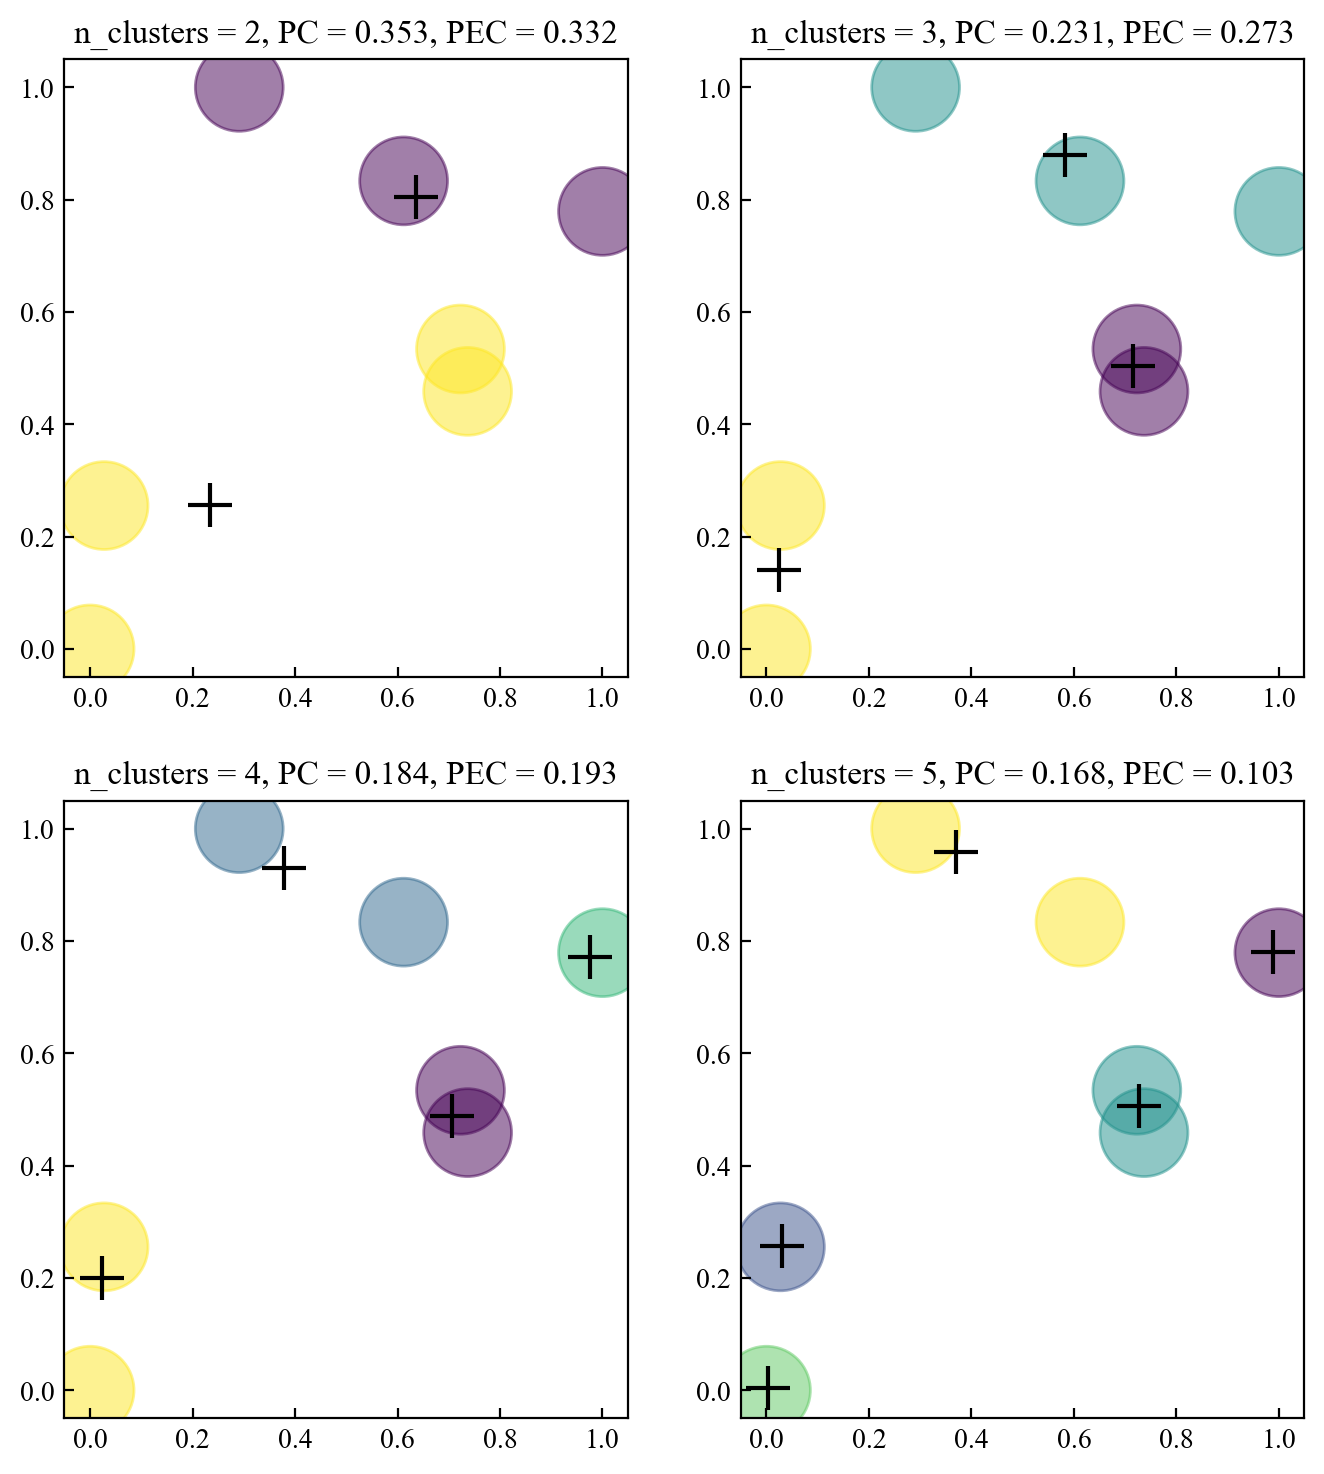

In [8]:
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(8, 9))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(B)
    # plot result
    axe.scatter(B[:,0], B[:,1], c=fcm_labels, alpha=.5, s=1000)     # 只能显示前两个特征
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=250, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')